In [1]:
import numpy as np
import scipy.special as sci
import matplotlib.pyplot as plt
from scipy import stats # linregress
import pandas as pd
from IPython.display import Latex

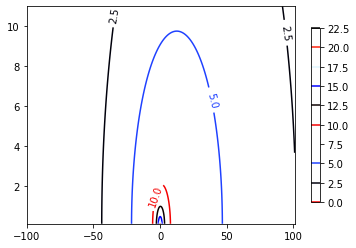

In [2]:
# Analytical solution from Bear (1976) - Line source, 1st-type input and infinte plane

# Input (values can be changed)
Co = 1 # mg/L, input concentration 
Dx = 3 # m, Dispersion in x direction 
Dy = Dx/10 # m
v = 0.05 # m/d
Q = 10 # m^3/d

## domain dimension and descritization (values can be changed)
xmin = -100; xmax= 101  
ymin = 0.1; ymax = 11
[x, y] = np.meshgrid(np.linspace(xmin, xmax, 1000), np.linspace(ymin, ymax, 100)) # mesh

# Bear (1976) solution Implementation 
#"k0: Modified Bessel function of second type and zero Order"

term1 = (Co*Q)/(2*np.pi* np.sqrt(Dx*Dy))
term2 = (x*v)/(2*Dx)
args = (v**2*x**2)/(4*Dx**2) + (v**2*y**2)/(4*Dx*Dy)
sol = term1*np.exp(term2)*sci.k0(args)

# plots
fig, ax = plt.subplots()
CS = ax.contour(x,y,sol, cmap='flag')
ax.clabel(CS, inline=1, fontsize= 10)
CB = fig.colorbar(CS, shrink=0.8, extend='both');

slope = 0.192    intercept= 0.775  R-squared=0.9990 

The required partition coefficient = slope,= 0.192 L/g 


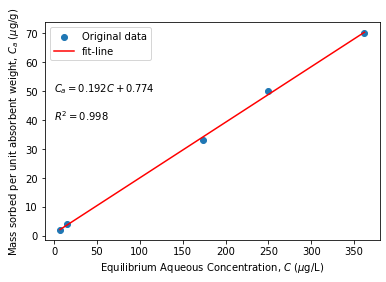

In [3]:
# Example of Henry isotherm (Source: Fetter et al. 2018)

# Following sorption data are available:

C = np.array([7, 15, 174, 249, 362]) # ug/L, Eq. concentration 
Ca = np.array([2, 4, 33, 50, 70]) # ug/g, Eq. sorbed mass 

# linear- fit y = m*x+c

slope, intercept, r_value, p_value, std_err = stats.linregress(C, Ca)
print("slope = %0.3f    intercept= %0.3f  R-squared=%0.4f" % (slope, intercept, r_value**2),'\n')
fit_line = slope*C + intercept

#plot

plt.scatter(C, Ca, label= "Original data") # data plot
plt.plot(C, fit_line, color = "red", label = "fit-line")
plt.legend(); plt.xlabel(r"Equilibrium Aqueous Concentration, $C$ ($\mu$g/L) ")
plt.ylabel(r"Mass sorbed per unit absorbent weight, $C_a$ ($\mu$g/g) ");  
plt.text(0, 50, '$C_a=%0.5s C + %0.5s$'%(slope, intercept), fontsize=10)
plt.text(0, 40, '$R^2=%0.5s $'%(r_value**2), fontsize=10)

# Output

print("The required partition coefficient = slope,= %0.5s L/g " % slope)

slope: 0.433    intercept: 2.283  R-squared: 0.999
Freundlich partitioning coefficient =  191.8 (mg/g)1/n (mg/L) and  Freundlich exponent = 0.43


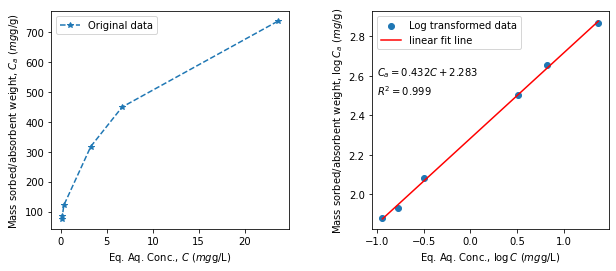

In [4]:
# Example of Freundlich isotherm

# Following sorption data are available:

Cf= np.array([23.6, 6.67, 3.26, 0.322, 0.169, 0.114]) # mg/L, Eq. concentration 
Caf = np.array([737, 450, 318, 121, 85.2, 75.8]) # mg/g, Eq. sorbed mass 

logCf = np.log10(Cf) # log10 transformation of data
logCaf = np.log10(Caf)

# fitting: y = mx +c
slope, intercept, r_value, p_value, std_err = stats.linregress(logCf, logCaf)
print("slope: %0.3f    intercept: %0.3f  R-squared: %0.3f" % (slope, intercept, r_value**2))
fit_line = slope*logCf + intercept

# plots
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(Cf, Caf, "*--", label= "Original data")
plt.legend(); plt.xlabel(r"Eq. Aq. Conc., $C$ ($mg$g/L) "); 
plt.ylabel(r"Mass sorbed/absorbent weight, $C_a$ ($mg$g/g) "); 

plt.subplot(122)
plt.scatter(logCf, logCaf, label="Log transformed data") 
plt.plot(logCf, fit_line, color="red", label= "linear fit line")
plt.legend(); plt.xlabel(r"Eq. Aq. Conc., $\log C$ ($mg$g/L) "); 
plt.ylabel(r"Mass sorbed/absorbent weight, $\log C_a$ ($mg$/g) "); 
plt.text(-1, 2.6, '$C_a=%0.5s C + %0.5s$'%(slope, intercept), fontsize=10)
plt.text(-1, 2.5, '$R^2=%0.5s $'%(r_value**2), fontsize=10)
plt.subplots_adjust(wspace=0.35)

print("Freundlich partitioning coefficient =  %0.5s (mg/g)1/n (mg/L) and  Freundlich exponent = %0.4s"  % (10**intercept, slope))

In [5]:
print("\033[0m You can change the provided values.\n")

ne = 0.4 #effective porosity [-]
rho = 1.25 # density of solid material [kg/m³]
Kd = 0.2 # distribution or partition coefficient [m³/kg]

#intermediate calculation
rho_b = (1-ne)*rho

#solution
R=1+(rho_b/ne)*Kd

print("effective porosity = {}\ndensity of solid material = {} kg/m³\nDistribution or partition coefficient = {} m³/kg\n".format(ne, rho, Kd))
print("\033[1mSolution:\033[0m\nThe resulting retardation factor is \033[1m{:02.4}\033[0m.".format(R))



 You can change the provided values.

effective porosity = 0.4
density of solid material = 1.25 kg/m³
Distribution or partition coefficient = 0.2 m³/kg

Solution:
The resulting retardation factor is 1.375.


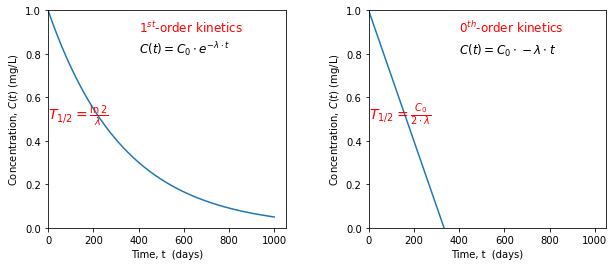

In [6]:
# behaviour of degradation kinetics

#input - you may change the values
Co = 1 # mg/L, initial concentration
la = 0.003 # unit is order dependent. For n=1, 1/t

# main equation
Z_order = lambda t: Co* np.exp(-la*t) # for n = 0
F_order = lambda t: Co-la*t # for n = 1

# simulation for t
t = np.linspace(1,1000, 1000) # 1000 time units
Z_results = Z_order(t)
F_results = F_order(t)

# plots
plt.figure(figsize=(10,4))

# n = 1
plt.subplot(121)
plt.plot(t, Z_results)
plt.ylim(0, Co); plt.xlim(0)
plt.text(400, Co*0.8, r"$C(t) = C_0 \cdot e^{-\lambda \cdot t} $", fontsize = 12) 
plt.text (400, Co*0.9, r"1$^{st}$-order kinetics", color = "red", fontsize = 12)
plt.text(0, Co/2, r"$T_{1/2}= \frac{\ln 2}{\lambda}$", color= "red", fontsize=14)
plt.xlabel("Time, t  (days)"); plt.ylabel(r"Concentration, $C(t)$ (mg/L)")

# n = 0
plt.subplot(122)
plt.plot(t, F_results)
plt.ylim(0, Co); plt.xlim(0)
plt.text(400, Co*0.8, r"$C(t) = C_0 \cdot-\lambda \cdot t} $", fontsize = 12)
plt.text (400, Co*0.9, r"0$^{th}$-order kinetics", color = "red", fontsize = 12)
plt.text(0, Co/2, r"$T_{1/2}= \frac{C_0}{2\cdot \lambda}$", color= "red", fontsize=14) 
plt.xlabel("Time, t  (days)"); plt.ylabel(r"Concentration, $C(t)$ (mg/L)")

plt.subplots_adjust(wspace=0.35)

   time (a)  Cobalt 60 (mg/L)  Strontium 90 (mg/L)
0         0             10.00                10.00
1         1              8.76                 9.76
2         2              7.68                 9.52
3         5              5.17                 8.84
4        10              2.68                 7.81
5        20              0.72                 6.10
6        28              0.25                 5.00

 The degradation rate (λ) for Cobalt 60 = 0.024 1/y and for Strontium 90 = 0.131 1/y 



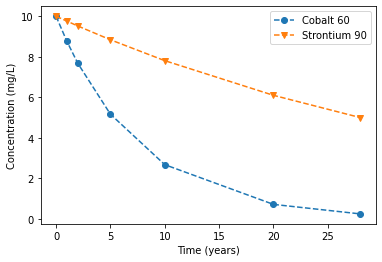

In [7]:
# Example of Radioactive decaly

#experimental results

t = [0, 1, 2, 5, 10, 20, 28 ] # yr, time
Co_60 = [10, 8.76, 7.68, 5.17, 2.68, 0.72, 0.25] # mg/L, Cobalt 60 conc.
So_90 = [10, 9.76, 9.52, 8.84, 7.81, 6.10, 5] # mg/L, Strontium 90 Conc.

z_list = list(zip(t, Co_60, So_90))

Cols= ["time (a)", "Cobalt 60 (mg/L)", "Strontium 90 (mg/L)"]
df = pd.DataFrame(z_list, columns=Cols)
print(df)

# computing
TH_Co60 = 28 # yr, Half life of Cobalt 60
TH_St90 = 5.26 # yr, Half life of Strontium 90
la_Co60 = np.log(2)/TH_Co60 # 1/yr, degradation rate of Cobalt 60
la_St90 = np.log(2)/TH_St90 # 1/yr, degradation rate of Strontium 90

# visualize
plt.plot(t, Co_60, "o--", label = "Cobalt 60") 
plt.plot(t, So_90, "v--", label= "Strontium 90")
plt.xlabel("Time (years)"); plt.ylabel("Concentration (mg/L)")
plt.legend();

print("\n The degradation rate (\u03BB) for Cobalt 60 = %0.5s 1/y and for Strontium 90 = %0.5s 1/y \n"  % (la_Co60, la_St90))

In [8]:
# Breakthrough curve using Kinzelbach (1987) analytical solution Main function

# The main function - you may change the value of C_o, lam, R, Dx, v, x
# C_o = input concentration, mg/L 
# lam = 0 # 1/d, degradation rate, 1/d 
# R = retardation factor, ()
# Dx = dispersion coeff. along x, m^2/d
# v = groundwater velocity, m/d
# x = position where C is to be measured, m

def Cx(t, C_o= 1, lam = 0, R=1, Dx=1, v= 10, x = 20):
    sterm = C_o*np.exp(-lam*t)
    erf_ag1 = (R*x-v*t)/(2*np.sqrt(Dx*R*t)) 
    erf_ag2 = (R*x+v*t)/(2*np.sqrt(Dx*R*t)) 
    
    C = sterm*(1-(0.5*sci.erfc(erf_ag1)-0.5*np.exp((v*x)/Dx)*sci.erfc(erf_ag2)))
    return C 


Text(5, 0.2, '$x= 20$ m')

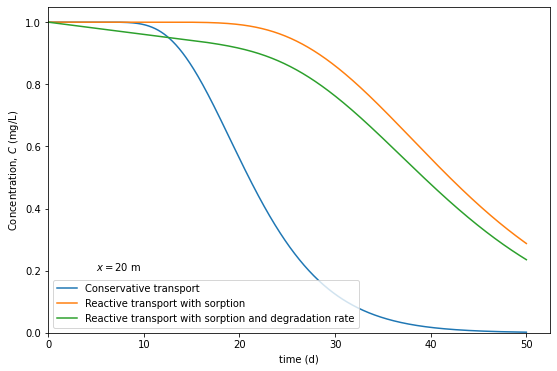

In [9]:
# Computing Case 1: Conservative process- R = 1, Lambda = 0
t1 = np.linspace(1e-5,50,1000) # times, d
C1 = Cx(t1, C_o= 1, lam = 0, R=1, Dx=1, v= 1, x = 20)

# Computing Case 2: Conservative system + Retardation - R = 2, Lambda = 0
t2 = np.linspace(1e-5,50,1000) # times, d
C2 = Cx(t2, C_o= 1, lam = 0, R=2, Dx=1, v= 1, x = 20)

# Computing Case 3: Conservative system + Retardation + degradation - R = 2, Lambda = 0.004
t3 = np.linspace(1e-5,50,1000) # times, d
C3 = Cx(t3, C_o= 1, lam = 0.004, R=2, Dx=1, v= 1, x = 20)

# plots - this should be adjusted as required 

plt.figure(figsize=(9, 6))

plt.plot(t1, C1, label="Conservative transport")
plt.plot(t2, C2, label = "Reactive transport with sorption")
plt.plot(t3, C3, label = "Reactive transport with sorption and degradation rate")
plt.legend(loc= 3); plt.xlim(0), plt.ylim(0)
plt.xlabel("time (d)"); plt.ylabel(r"Concentration, $C$ (mg/L)")
plt.text(5, 0.2, r"$x= 20$ m") 